# **Using Pycaret to evaluate the TS models**

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

https://pycaret.readthedocs.io/en/latest/index.html

https://towardsdatascience.com/announcing-pycarets-new-time-series-module-b6e724d4636c

### **Installation and Import**

In [ ]:
# Installing Pycaret slim version
# !pip install Pycaret
!pip install pycaret-ts-alpha

In [2]:
# Import the packages
import pandas as pd
import numpy as np
from pycaret.time_series import *
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/input.xlsx')

In [5]:
df.head()

,Date,SalesVolume
0,1995-01-01,47639.0
1,1995-02-01,47880.0
2,1995-03-01,67025.0
3,1995-04-01,56925.0
4,1995-05-01,64192.0


In [6]:
df = df.dropna()
df['Date'] = pd.DatetimeIndex(df['Date'])
df = df.groupby('Date').sum()
#Settting a Monthly frequency and also to the first day of the month
df = df.asfreq('MS')

In [7]:
# df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/USD_GBP_EX_RATE.xlsx')
# df['DEXUSUK']=df['DEXUSUK'].mask(df['DEXUSUK']==0)
# df = df.fillna(method='ffill')
# df['DEXUSUK']=df['DEXUSUK'].mask(df['DEXUSUK']==0).fillna(df['DEXUSUK'].mean())
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=4, weights="uniform")
# reshape_ip = np.array(df['DEXUSUK']).reshape(-1,1)
# reshape_op = imputer.fit_transform(reshape_ip)
# df['DEXUSUK'] = reshape_op
# df['observation_date'] = pd.DatetimeIndex(df['observation_date'])
# df = df.groupby('observation_date').sum()
# df = df.asfreq('D')

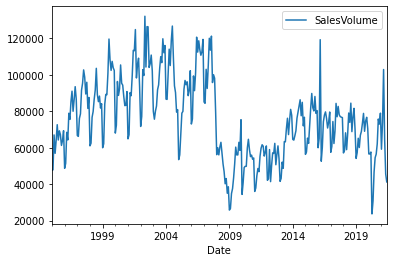

In [8]:
df.plot()

### **EDA using Pycaret**

In [9]:
# with functional API
setup(df['SalesVolume'], fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(318, 1)"
2,Missing Values,False
3,Transformed Train Set,"(311,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


In [10]:
# with new object-oriented API
exp = TimeSeriesExperiment()
exp.setup(df, fh = 7, fold = 3, session_id = 123)
exp.models()

,Description,Value
0,session_id,123
1,Original Data,"(318, 1)"
2,Missing Values,False
3,Transformed Train Set,"(311,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


## **Plotting**

In [11]:
# Without any argument, this will plot the original dataset
exp.plot_model()

In [12]:
# Without an estimator argument, this will plot the original dataset
exp.plot_model(plot="ts")

In [13]:
# ACF and PACF for the original dataset
exp.plot_model(plot="acf")

In [14]:
# NOTE: you can customize the plots with kwargs - e.g. number of lags, figure size (width, height), etc
# data_kwargs such as `nlags` are passed to the underlying functon that gets the ACF values
# figure kwargs such as `fig_size` & `fig_template` are passed to plotly and can have any value that plotly accepts
exp.plot_model(plot="pacf", data_kwargs={'nlags':36, }, fig_kwargs={'fig_size': [800, 500], 'fig_template': 'simple_white'})

In [15]:
exp.plot_model(plot="decomp_classical")
exp.plot_model(plot="decomp_classical", data_kwargs={'type': 'additive'})
exp.plot_model(plot="decomp_stl")

In [16]:
# Show the train-test splits on the dataset
# Internally split - len(fh) as test set, remaining used as test set
exp.plot_model(plot="train_test_split")

# Show the Cross Validation splits inside the train set
exp.plot_model(plot="cv")

In [17]:
# Plot diagnostics
exp.plot_model(plot="diagnostics")

In [18]:
exp.check_stats(alpha = 0.2)

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,318
1,Summary,Statistics,Mean,,76225.5
2,Summary,Statistics,Median,,75924
3,Summary,Statistics,Standard Deviation,,21928.4
4,Summary,Statistics,Variance,,4.80856e+08
5,Summary,Statistics,Kurtosis,,-0.459261
6,Summary,Statistics,Skewness,,0.208777
7,Summary,Statistics,# Distinct Values,,316
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.2, 'K': 24}",1922.53
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.2, 'K': 48}",2443.54


In [154]:
# functional API
# plot_model(plot = 'ts')
# object-oriented API
exp.plot_model(plot = 'ts')

In [155]:
# cross-validation plot
plot_model(plot = 'cv')

In [156]:
# ACF plot
plot_model(plot = 'acf')

In [157]:
# Diagnostics plot
plot_model(plot = 'diagnostics')

In [158]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

In [159]:
# object-oriented API
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,5267.49,8256.75,0.1343,0.0994,0.486,0.0900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,6136.95,8981.59,0.1573,0.1123,0.3901,0.6833
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,7325.42,10021.3,0.1727,0.1325,0.0975,0.0533
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & De...,7913.84,9668.31,0.1579,0.1445,-0.5993,0.0300
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,8083.55,10404.8,0.1846,0.1466,0.2294,0.0267
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,8220.7,10541.1,0.1862,0.1491,0.2106,0.0300
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,8266.7,10580.3,0.1869,0.15,0.2048,0.0267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,8266.7,10580.3,0.1869,0.15,0.2048,0.0333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,8266.7,10580.3,0.1869,0.15,0.2048,0.0300
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,8266.7,10580.3,0.1869,0.15,0.2048,0.0300


In [160]:
# create fbprophet model
prophet = create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2019-02-28,10062.2476,10504.8515,0.1465,0.1357,-2.5711
1,2019-09-30,11405.3938,18197.0775,0.3443,0.2110,-0.1884
2,2020-04-30,21483.2853,25822.4290,0.4824,0.3446,-2.2584
Mean,NaT,14316.9755,18174.7860,0.3244,0.2304,-1.6726
SD,NaT,5096.9276,6253.3947,0.1379,0.0864,1.0573


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [161]:
plot_model(best, plot = 'forecast')

In [162]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [163]:
# in-sample plot
plot_model(best, plot = 'insample')

In [164]:
# finalize model
final_best = finalize_model(best)
# generate predictions
predict_model(final_best, fh = 90)

2021-07    50379.1485
2021-08    53314.7995
2021-09    59712.5149
2021-10    73908.9828
2021-11    71576.9966
              ...    
2028-08    53371.1188
2028-09    59799.8929
2028-10    74020.0964
2028-11    71706.2490
2028-12    78044.6094
Freq: M, Name: SalesVolume, Length: 90, dtype: float64